Epoch 1/10
814/814 [==============================] - 4s 3ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 2.7682e-05 - val_accuracy: 1.0000
Epoch 2/10
814/814 [==============================] - 2s 3ms/step - loss: 1.4044e-05 - accuracy: 1.0000 - val_loss: 6.5825e-06 - val_accuracy: 1.0000
Epoch 3/10
814/814 [==============================] - 2s 3ms/step - loss: 4.3492e-06 - accuracy: 1.0000 - val_loss: 2.6292e-06 - val_accuracy: 1.0000
Epoch 4/10
814/814 [==============================] - 2s 3ms/step - loss: 1.9272e-06 - accuracy: 1.0000 - val_loss: 1.2819e-06 - val_accuracy: 1.0000
Epoch 5/10
814/814 [==============================] - 2s 3ms/step - loss: 9.9172e-07 - accuracy: 1.0000 - val_loss: 6.9133e-07 - val_accuracy: 1.0000
Epoch 6/10
814/814 [==============================] - 2s 3ms/step - loss: 5.5186e-07 - accuracy: 1.0000 - val_loss: 3.9397e-07 - val_accuracy: 1.0000
Epoch 7/10
814/814 [==============================] - 2s 3ms/step - loss: 3.2162e-07 - accuracy: 1.0000 

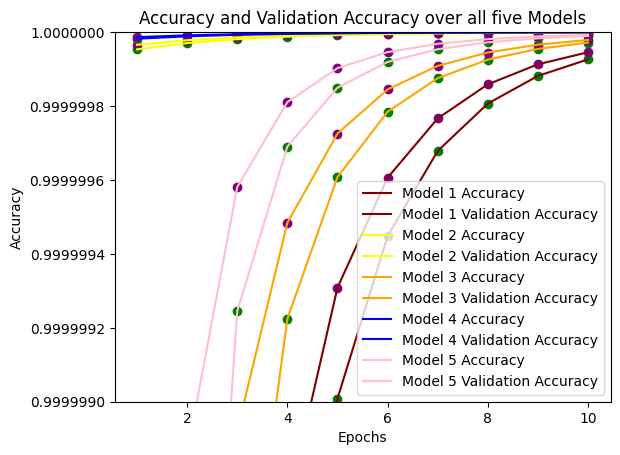

<Figure size 640x480 with 0 Axes>

Epoch 1/10
407/407 [==============================] - 2s 3ms/step - loss: 0.0652 - accuracy: 0.9753 - val_loss: 5.7759e-06 - val_accuracy: 1.0000
Epoch 2/10
407/407 [==============================] - 2s 4ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 1.1198e-07 - val_accuracy: 1.0000
Epoch 3/10
407/407 [==============================] - 1s 3ms/step - loss: 8.0964e-04 - accuracy: 0.9999 - val_loss: 7.8532e-09 - val_accuracy: 1.0000
Epoch 4/10
407/407 [==============================] - 1s 4ms/step - loss: 3.4348e-04 - accuracy: 1.0000 - val_loss: 7.0643e-10 - val_accuracy: 1.0000
Epoch 5/10
407/407 [==============================] - 1s 3ms/step - loss: 3.8024e-04 - accuracy: 1.0000 - val_loss: 7.7383e-11 - val_accuracy: 1.0000
Epoch 6/10
407/407 [==============================] - 1s 3ms/step - loss: 3.0373e-04 - accuracy: 1.0000 - val_loss: 1.4377e-11 - val_accuracy: 1.0000
Epoch 7/10
407/407 [==============================] - 1s 3ms/step - loss: 2.3092e-04 - accuracy: 0.9999 - va

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]

df = pd.read_csv("C:/Users/Raj/Downloads/Machine Learning and Data Mining/Lab Assignments/Dataset for Homework 1/Adult/adult.data", names=columns, na_values=["?"])

# Drop rows with missing values
df = df.dropna()

# Changing all the categories into numerical values.
label_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Since we are predicting the income, we will have to drop it and turn it into a new variable.
X = df.drop('income', axis=1)
y = df['income']

# Standardizing the data.
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Changing >=50 into 1, 0 otherwise.
y = (y == '>50K').astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the models
model = Sequential()

# Input layer with ReLU activation function
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer with ReLU activation function
model.add(Dense(64, activation='relu'))

# Output layer with sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model 1.
m1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
acc1 = m1.history['accuracy']
val_acc1 = m1.history['val_accuracy']
loss1 = m1.history['loss']
val_loss1 = m1.history['val_loss']

# Train model 2.
model.add(Dropout(0.5)) # fifty percent dropout rate 
m2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
acc2 = m2.history['accuracy']
val_acc2 = m2.history['val_accuracy']
loss2 = m2.history['loss']
val_loss2 = m2.history['val_loss']

# Train model 3.
# model.layers.pop() # removes the last layer from the model
# model.add(Dropout(0.0)) # removes the dropout
# model.add(Dense(32, activation='relu'), index=2) # adds a layer to the model as specified in the question.
# The layer is added just before the dropout layer
model3 = Sequential()

# Input layer with ReLU activation function
model3.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer with ReLU activation function
model3.add(Dense(64, activation='relu'))

# Hidden layer with ReLU activation function
model3.add(Dense(32, activation='relu'))

# Output layer with sigmoid activation function
model3.add(Dense(1, activation='sigmoid'))

# Compiling the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

m3 = model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
acc3 = m3.history['accuracy']
val_acc3 = m3.history['val_accuracy']
loss3 = m3.history['loss']
val_loss3 = m3.history['val_loss']

# Train model 4.
model3.add(Dropout(0.5)) # 50 percent dropout rate added again
m4 = model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
acc4 = m4.history['accuracy']
val_acc4 = m4.history['val_accuracy']
loss4 = m4.history['loss']
val_loss4 = m4.history['val_loss']

# Train model 5 (three hidden layers, and a total of two layers, without dropout):
model5 = Sequential()

# Input layer
model5.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer with ReLU activation function
model5.add(Dense(64, activation='relu'))

# Hidden layer with ReLU activation function
model5.add(Dense(32, activation='relu'))

# Hidden layer with ReLU activation function
model5.add(Dense(16, activation='relu'))

# Output layer with sigmoid activation function
model5.add(Dense(1, activation='sigmoid'))

# Compiling the model
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
m5 = model5.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
acc5 = m5.history['accuracy']
val_acc5 = m5.history['val_accuracy']
loss5 = m5.history['loss']
val_loss5 = m5.history['val_loss']

epochs = list(range(1, 11))

# Accuracy for all models is too high (accuracy is too close to each other for all models). 
# Therefore, I took the loss as the primary metric and recalculated accuracy from it to plot. 
# Loss values have higher precision. The loss is already scaled to show values between 0 and 1.
# Therefore, I subracted loss from one and found accuacy.


loss1 = [1 - x for x in loss1]
val_loss1 = [1 - x for x in val_loss1]
loss2 = [1 - x for x in loss2]
val_loss2 = [1 - x for x in val_loss2]
loss3 = [1 - x for x in loss3]
val_loss3 = [1 - x for x in val_loss3]
loss4 = [1 - x for x in loss4]
val_loss4 = [1 - x for x in val_loss4]
loss5 = [1 - x for x in loss5]
val_loss5 = [1 - x for x in val_loss5]

plt.scatter(epochs, loss1, c='green') 
plt.scatter(epochs, val_loss1, c='purple') 
plt.scatter(epochs, loss2, c='green') 
plt.scatter(epochs, val_loss2, c='purple') 
plt.scatter(epochs, loss3, c='green') 
plt.scatter(epochs, val_loss3, c='purple') 
plt.scatter(epochs, loss4, c='green') 
plt.scatter(epochs, val_loss4, c='purple') 
plt.scatter(epochs, loss5, c='green') 
plt.scatter(epochs, val_loss5, c='purple') 

plt.plot(epochs, loss1, 'maroon', label='Model 1 Accuracy ') 
plt.plot(epochs, val_loss1, 'maroon', label='Model 1 Validation Accuracy') 
plt.plot(epochs, loss2, 'yellow', label='Model 2 Accuracy') 
plt.plot(epochs, val_loss2, 'yellow', label='Model 2 Validation Accuracy') 
plt.plot(epochs, loss3, 'orange', label='Model 3 Accuracy') 
plt.plot(epochs, val_loss3, 'orange', label='Model 3 Validation Accuracy') 
plt.plot(epochs, loss4, 'blue', label='Model 4 Accuracy') 
plt.plot(epochs, val_loss4, 'blue', label='Model 4 Validation Accuracy') 
plt.plot(epochs, loss5, 'pink', label='Model 5 Accuracy') 
plt.plot(epochs, val_loss5, 'pink', label='Model 5 Validation Accuracy') 

plt.ylim([1-(1e-6), 1])

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy and Validation Accuracy over all five Models")
plt.ticklabel_format(useOffset=False)
plt.legend()
plt.figure()
plt.show()



### Question 4e:

# The dropout increaases the accuracy. Although the accuracies of the two models were similar,
# we are able to see that the m2 model performed better than the m1 model because of dropout.
# The statistics of m1 after 1 epoch
# loss: 0.0095, accuracy: 0.9992, validation loss: 4.6302e-05, validation accuracy: 1.0000 
# The statistics of m2 after 1 epoch
# loss: 2.3155e-05, accuracy: 1.0000, validation loss: 1.0889e-05, validation accuracy: 1.0000
# That is because we introduced dropout in m2. 
# The best model turned out to be the m4 model with dropout and the largest number of hidden layers.

### Question 4f: Using the M4 model.

# Load the dataset
columns6 = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]

df6 = pd.read_csv("C:/Users/Raj/Downloads/Machine Learning and Data Mining/Lab Assignments/Dataset for Homework 1/Adult/adulttest.csv", names=columns, na_values=["?"])

# Drop rows with missing values
df6 = df6.dropna()

# Changing all the categories into numerical values.
label_cols6 = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
label_encoder6 = LabelEncoder()
for col in label_cols6:
    df6[col] = label_encoder.fit_transform(df6[col])

# Since we are predicting the income, we will have to drop it and turn it into a new variable.
X6 = df6.drop('income', axis=1)
y6 = df6['income']

# Standardizing the data.
scaler = StandardScaler()
X6 = scaler.fit_transform(X6)

# Changing >=50 into 1, 0 otherwise.
y6 = (y6 == '>50K').astype(int)

# Split the data into training and testing sets
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

model6 = Sequential()

# Input layer
model6.add(Dense(128, input_dim=X6_train.shape[1], activation='relu'))
model6.add(Dropout(0.5))

# Hidden layers
model6.add(Dense(64, activation='relu'))
model6.add(Dropout(0.5))

model6.add(Dense(32, activation='relu'))
model6.add(Dropout(0.5))

# Output layer
model6.add(Dense(1, activation='sigmoid'))

# Compile the model
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model6.fit(X6_train, y6_train, epochs=10, batch_size=32, validation_data=(X6_test, y6_test))

# Evaluate the model
loss, accuracy = model6.evaluate(X6_test, y6_test)
print(f"Test Loss: %0.4f" % loss)
print(f"Test Accuracy: %0.2f" % (accuracy * 100))

# It appears that the loss and accuracy are completely perfect with the testing set. Therefore,
# it would be the best model to use for the test set.